In [24]:
import sys
import os
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scripts.data_analyzer import euclidean_distance
import numpy as np

In [6]:
sys.path.append("../")


In [7]:
from scripts.data_loader import load_data_from_postgres,load_data_using_sqlalchemy,execute_query,top_5_handsets_for_top_3_manufacturers


In [8]:
# SQL query to load all column and all rows of the dataset in the postgresql database
query = "SELECT * FROM xdr_data;"  

# Load data: defined in scripts\dataloader at load_data_from_postgres function
df = load_data_from_postgres(query)
df.head()


c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_loader.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

## Treating Missing Values

In [10]:
# Check for missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Task 3 - Experience Analytics

#### Handle Outliers and missing values

In [11]:
from decimal import Decimal
from scripts.data_cleaner import clean_missing_data, clean_outlier

clean_missing_data(df,'replace_with_mode', 'MSISDN/Number')
clean_missing_data(df, 'replace_with_mean', 'TCP DL Retrans. Vol (Bytes)')
clean_missing_data(df, 'replace_with_mean', 'TCP UL Retrans. Vol (Bytes)')
clean_missing_data(df, 'replace_with_mean', 'Avg RTT UL (ms)')
clean_missing_data(df, 'replace_with_mean', 'Avg RTT DL (ms)')
clean_missing_data(df, 'replace_with_mean', 'Avg Bearer TP UL (kbps)')
clean_missing_data(df, 'replace_with_mean', 'Avg Bearer TP DL (kbps)')


df['Total_Avg_RTT']  = pd.to_numeric(df['Avg RTT DL (ms)'], errors='coerce') + pd.to_numeric(df['Avg RTT UL (ms)'], errors='coerce')
df['Total_Avg_TCP_Retrans']  = pd.to_numeric(df['TCP DL Retrans. Vol (Bytes)'], errors='coerce') + pd.to_numeric(df['TCP UL Retrans. Vol (Bytes)'], errors='coerce')
df['Total_Avg_TP']  = pd.to_numeric(df['Avg Bearer TP DL (kbps)'], errors='coerce') + pd.to_numeric(df['Avg Bearer TP UL (kbps)'], errors='coerce')

clean_outlier(df, 'replace_with_mean', 'Total_Avg_RTT')
clean_outlier(df, 'replace_with_mean', 'Total_Avg_TCP_Retrans')
clean_outlier(df, 'replace_with_mean','Total_Avg_TP')


successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed


c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_cleaner.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)
c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_cleaner.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change i

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_Avg_RTT,Total_Avg_TCP_Retrans,Total_Avg_TP
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,47.000000,2.156957e+07,67.000000
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,70.000000,2.156957e+07,42.000000
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,127.458589,2.156957e+07,15.000000
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,127.458589,2.156957e+07,88.000000
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,127.458589,2.156957e+07,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,32.000000,2.156957e+07,117.000000
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,29.000000,2.156957e+07,77.000000
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,49.000000,2.156957e+07,90.000000
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,42.000000,2.156957e+07,71.000000


#### Task 3. 1 - Aggregate, per customer, for Average TCP retransmission, Average RTT, Handset type, Average throughput


In [12]:
# Aggregate per customer
aggregated_df = df.groupby('MSISDN/Number').agg(
    avg_tcp_retransmission=('Total_Avg_TCP_Retrans', 'mean'),
    avg_rtt=('Total_Avg_RTT', 'mean'),
    avg_throughput=('Total_Avg_TP', 'mean'),
    most_common_handset_type=('Handset Type', lambda x: x.mode()[0])
).reset_index()
aggregated_df.head()

,MSISDN/Number,avg_tcp_retransmission,avg_rtt,avg_throughput,most_common_handset_type
0,3.360100e+10,2.156957e+07,46.000000,76.0,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,2.156957e+07,31.000000,99.0,Apple iPhone 7 (A1778)
2,3.360100e+10,2.156957e+07,127.458589,97.0,undefined
3,3.360101e+10,7.607247e+05,84.000000,248.0,Apple iPhone 5S (A1457)
4,3.360101e+10,1.547020e+07,59.500000,28422.0,Apple iPhone Se (A1723)


#### Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:

In [13]:
from scripts.data_analyzer  import  compute_top_bottom_most_frequent


# TCP retransmission values
top_tcp, bottom_tcp, most_frequent_tcp = compute_top_bottom_most_frequent(df['Total_Avg_TCP_Retrans'])
print("Top 10 TCP Retransmission values:\n", top_tcp)
print("\nBottom 10 TCP Retransmission values:\n", bottom_tcp)
print("\nMost Frequent TCP Retransmission values:\n", most_frequent_tcp)


# RTT values
top_rtt, bottom_rtt, most_frequent_rtt = compute_top_bottom_most_frequent(df['Total_Avg_RTT'])
print("\nTop 10 RTT values:\n", top_rtt)
print("\nBottom 10 RTT values:\n", bottom_rtt)
print("\nMost Frequent RTT values:\n", most_frequent_rtt)

# Throughput values
top_throughput, bottom_throughput, most_frequent_throughput = compute_top_bottom_most_frequent(df['Total_Avg_TP'])
print("\nTop 10 Throughput values:\n", top_throughput)
print("\nBottom 10 Throughput values:\n", bottom_throughput)
print("\nMost Frequent Throughput values:\n", most_frequent_throughput)

Top 10 TCP Retransmission values:
 93491     3.762512e+08
116478    3.761993e+08
97431     3.755277e+08
85784     3.749876e+08
115673    3.743887e+08
121404    3.724200e+08
121439    3.722753e+08
61581     3.704206e+08
79919     3.699591e+08
17654     3.687675e+08
Name: Total_Avg_TCP_Retrans, dtype: float64

Bottom 10 TCP Retransmission values:
 143594     86.0
111113     97.0
18432     106.0
13157     108.0
97070     113.0
8816      128.0
99959     129.0
83227     134.0
95966     134.0
12866     143.0
Name: Total_Avg_TCP_Retrans, dtype: float64

Most Frequent TCP Retransmission values:
 0    2.156957e+07
Name: Total_Avg_TCP_Retrans, dtype: float64

Top 10 RTT values:
 92403     1818.0
135363    1816.0
24290     1814.0
50366     1813.0
133606    1809.0
145025    1809.0
19585     1808.0
117192    1808.0
22410     1805.0
110702    1800.0
Name: Total_Avg_RTT, dtype: float64

Bottom 10 RTT values:
 42612     0.0
103328    0.0
124544    0.0
143878    0.0
71739     2.0
50974     4.0
144923  

# Task 3.3 : Throughput and TCP Retrns. Distribution

#### The distribution of the average throughput and the average TCP retransmission  per handset type and provide interpretation 


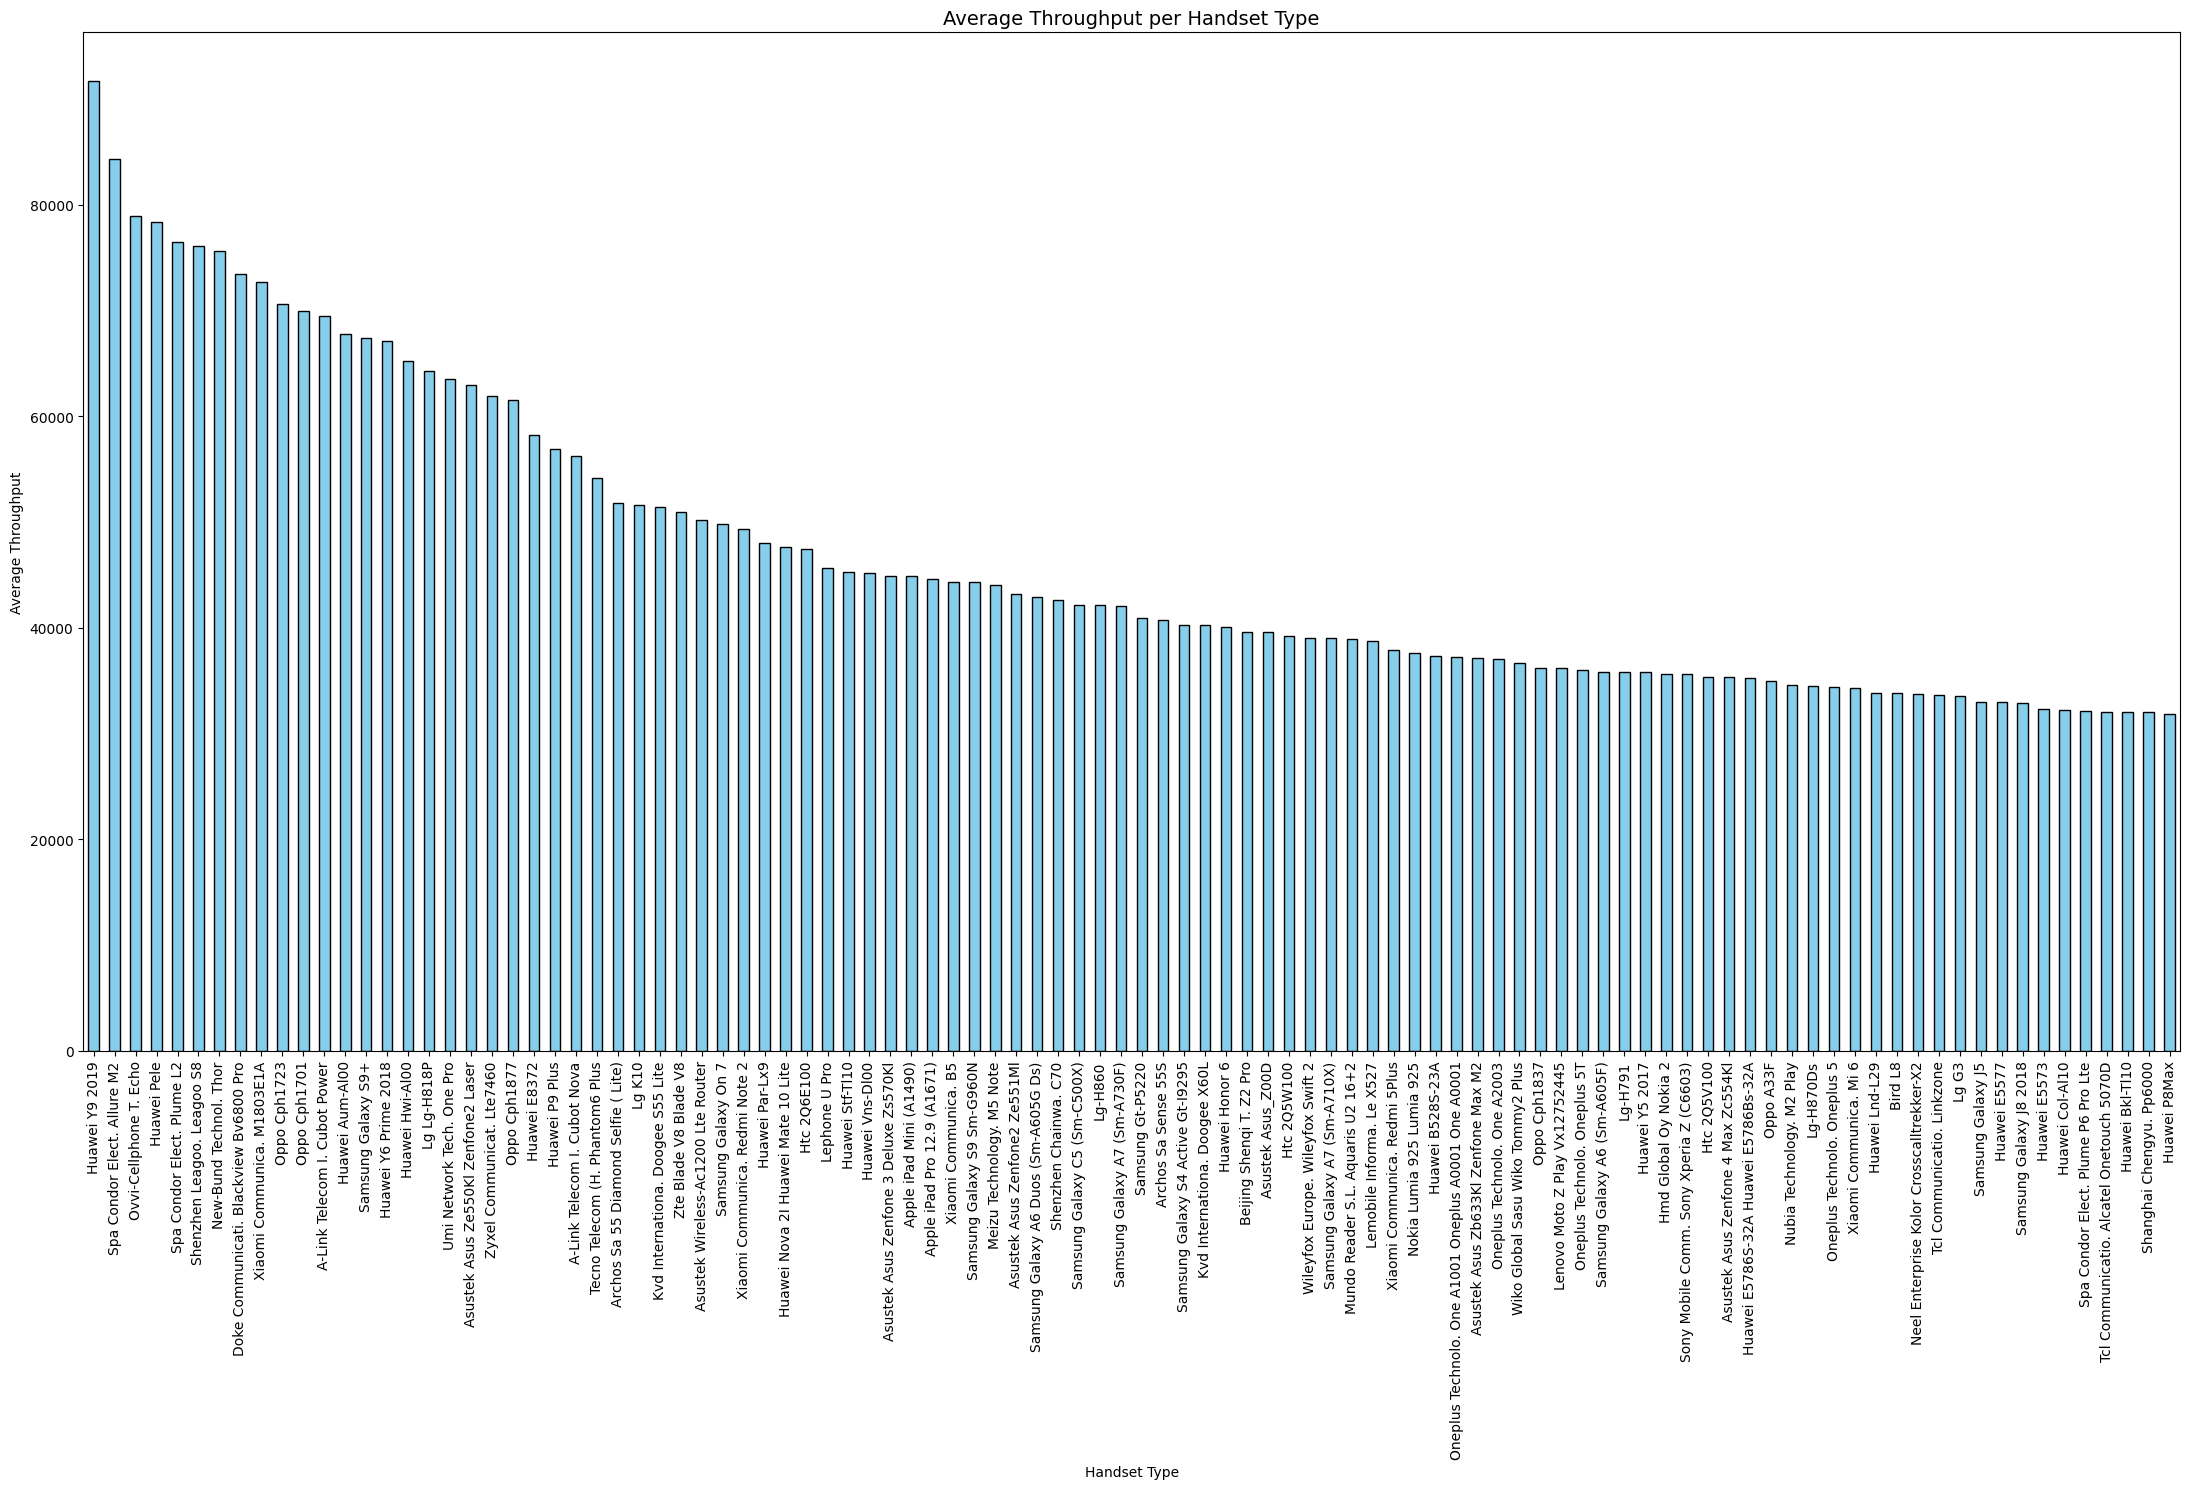

In [14]:
# Group by handset type and compute the average throughput
avg_throughput_per_handset = df.groupby('Handset Type')['Total_Avg_TP'].mean().sort_values(ascending=False).head(100)

# Plot the distribution of average throughput
plt.figure(figsize=(22, 15))
avg_throughput_per_handset.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Throughput per Handset Type', fontsize=14)
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Interpretation of Average Throughput Distribution per Handset Type

**Interpretation of Findings:**

**Throughput Leaders:** > Huawei Y9 2019 is the handset with highest average throughput. These might represent newer or high-performance devices that can handle faster network speeds.
**Throughput Laggards:** > Rim 9780 Rcm72Uw Rcm73Uw (Fdd I Ii V Vi) (Generic) is handsets with the lowest throughput might indicate older devices, lower network compatibility, or usage in areas with poor connectivity.
**Overall Trends:** Among the above shown 100 handset types there seems closer trend across the throughput distribution values  and has fairly consistent across the board.

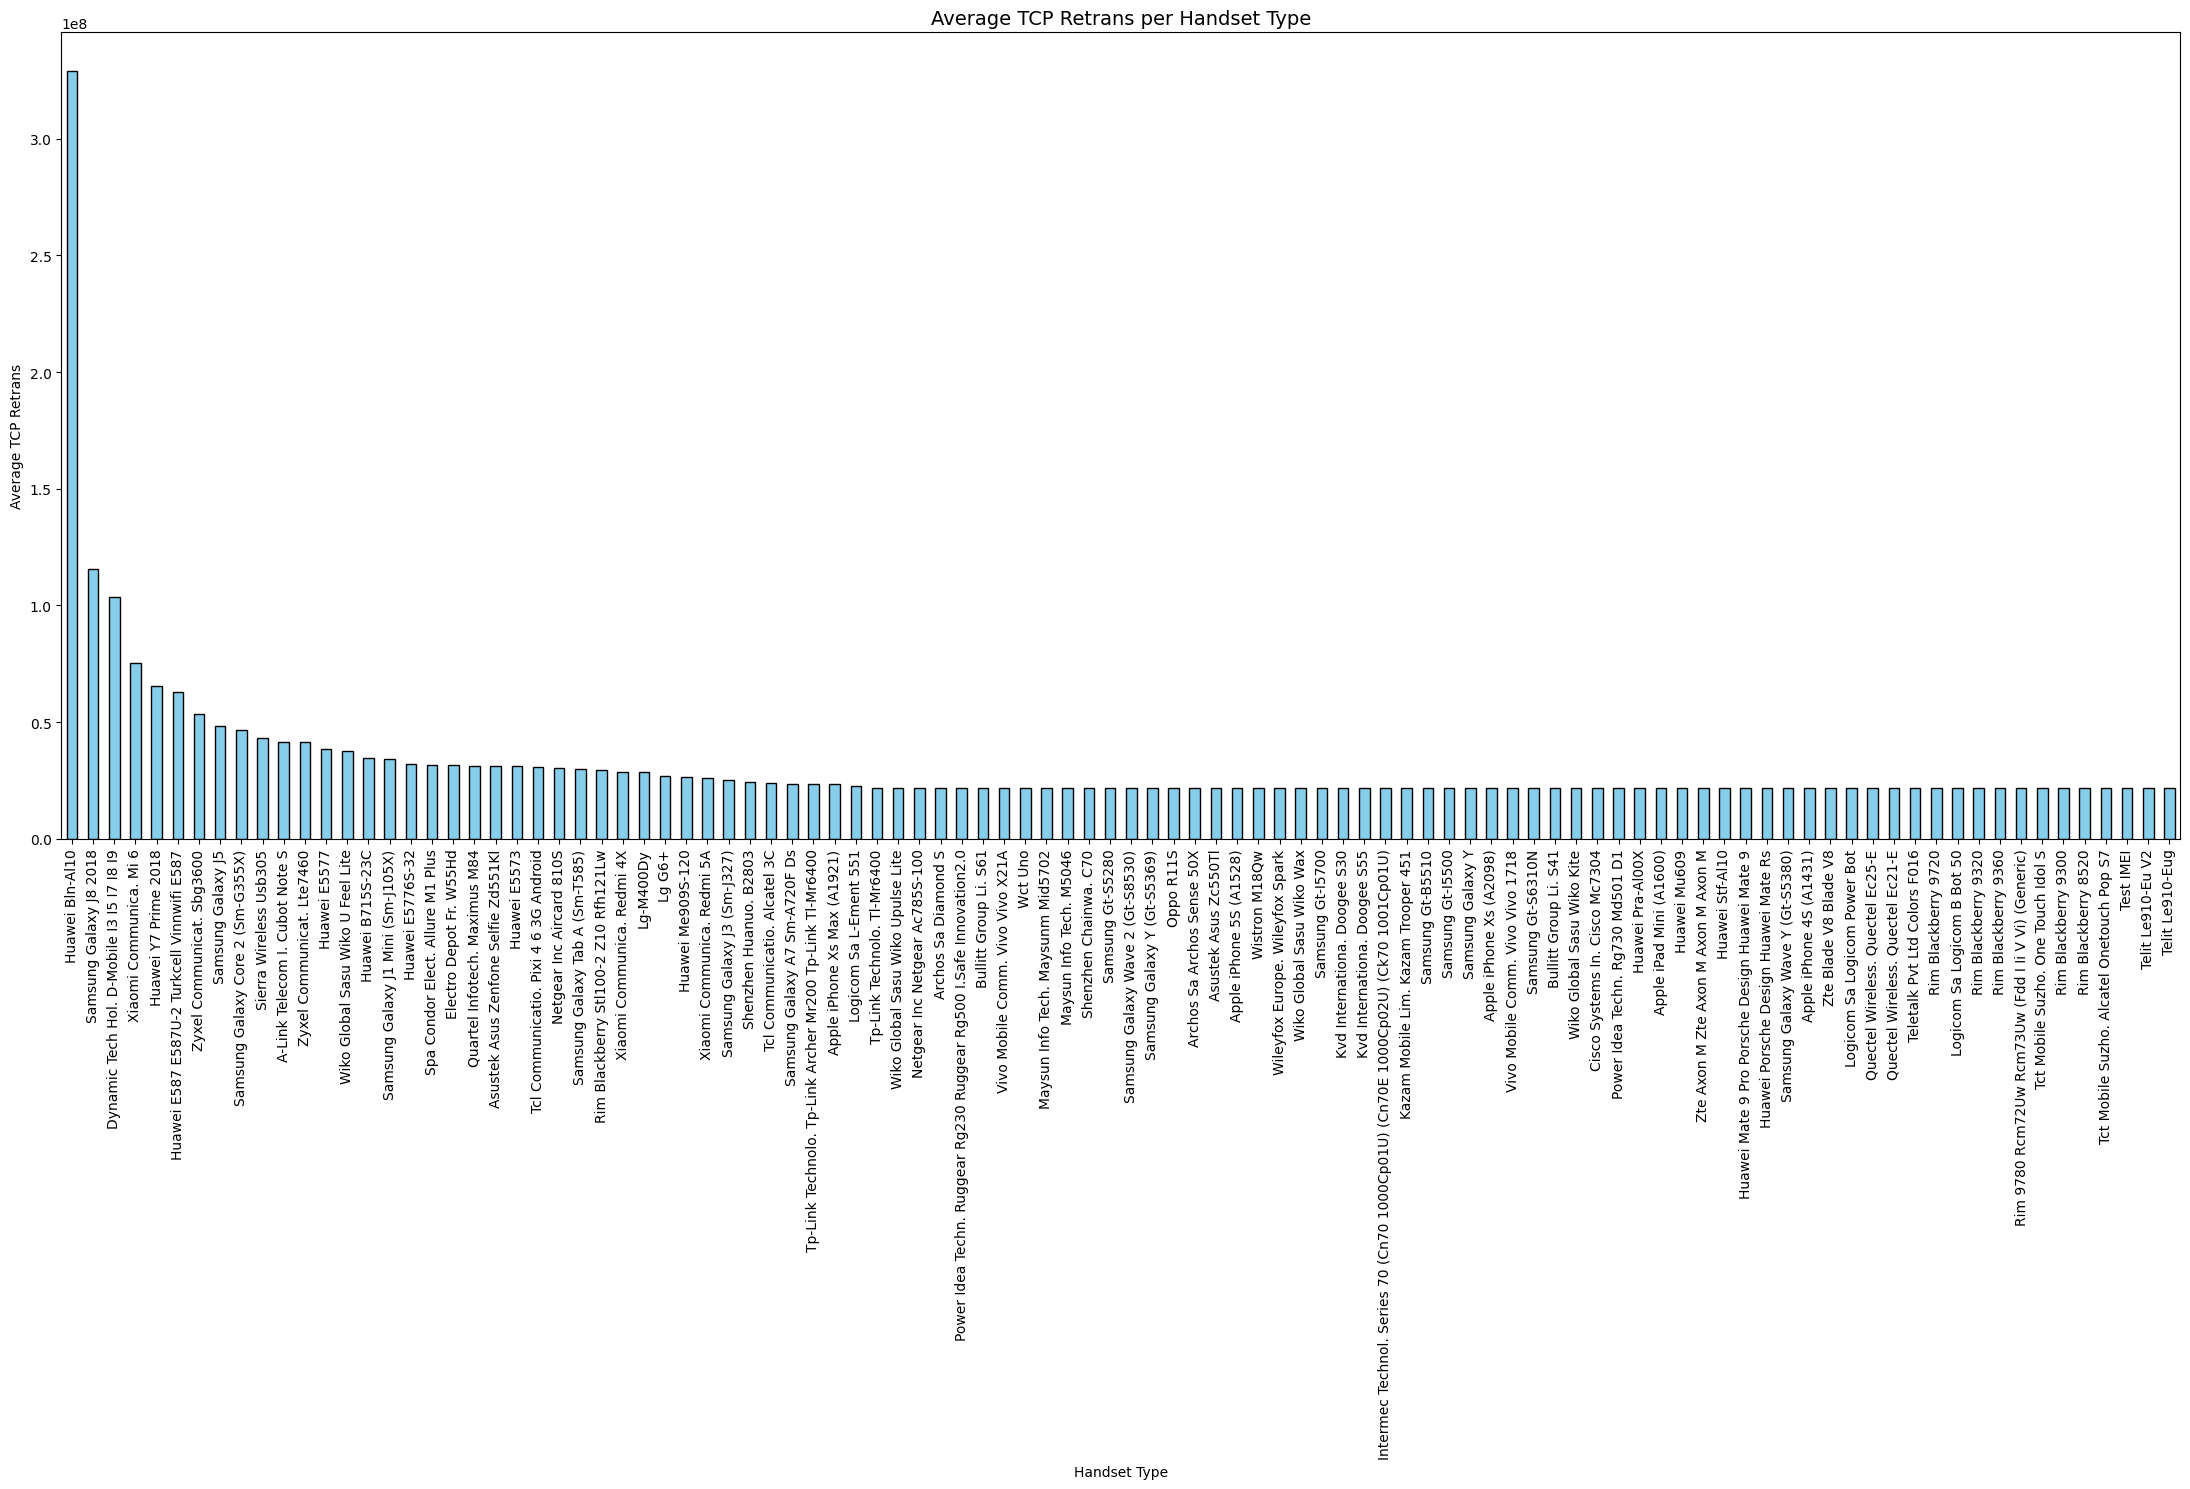

In [15]:
# Group by handset type and compute the average TCP Retrans
avg_TCP_Retrans_per_handset = df.groupby('Handset Type')['Total_Avg_TCP_Retrans'].mean().sort_values(ascending=False).head(100)

# Plot the distribution of average throughput
plt.figure(figsize=(22, 15))
avg_TCP_Retrans_per_handset.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average TCP Retrans per Handset Type', fontsize=14)
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retrans')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Interpretation of Average TCP Retrans. Distribution per Handset Type

**Interpretation of Findings:**

**TCP Retrans Leaders:** > Huawei Bln-Al10  is the handset with highest average TCP Retrans.. These might represent newer or high-performance devices that can handle faster network speeds.
**TCP Retrans Laggards:** > Rim Blackberry 9320 is handsets with the lowest  TCP Retrans might indicate older devices, lower network compatibility, or usage in areas with poor connectivity.
**Overall Trends:** Among the above shown 100 handset types there seems closer trend across the  TCP Retrans distribution values  and has fairly consistent across the board.

# Task 3.4 K-means

Cluster Analysis:
          Total_Avg_RTT  Total_Avg_TP  Total_Avg_TCP_Retrans
Cluster                                                    
0            82.899487   2625.309092           1.925086e+07
1           893.292686  10510.066912           1.065914e+07
2            99.479267  45944.482900           5.397349e+06


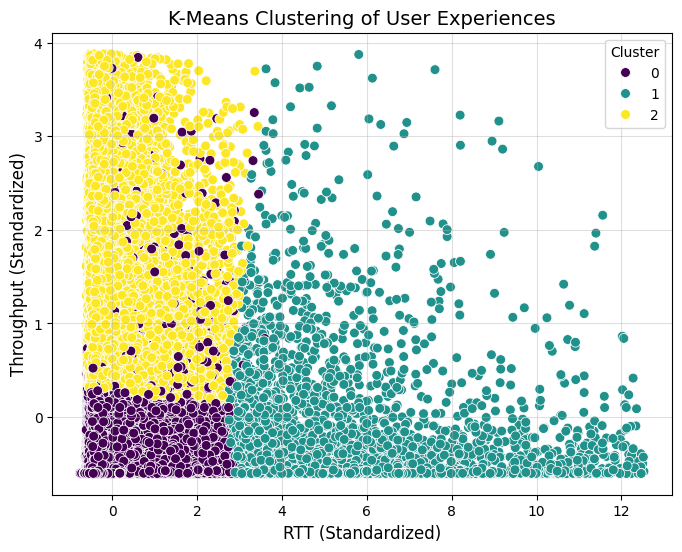

In [ ]:

from sklearn.preprocessing  import StandardScaler
from sklearn.cluster import KMeans

metrics = ['Total_Avg_RTT', 'Total_Avg_TP', 'Total_Avg_TCP_Retrans']
df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

# Handle missing values by replacing with the mean
df[metrics] = df[metrics].fillna(df[metrics].mean())

# Normalize the data using StandardScaler (mean=0, variance=1)
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(df[metrics])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(metrics_scaled)

# Analyze Clusters
cluster_analysis = df.groupby('Cluster')[metrics].mean()
print("Cluster Analysis:\n", cluster_analysis)

# Visualize Clusters
# Scatter plot using first two metrics (RTT and Throughput)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=metrics_scaled[:, 0], 
    y=metrics_scaled[:, 1], 
    hue=df['Cluster'], 
    palette='viridis', 
    s=50
)
plt.title('K-Means Clustering of User Experiences', fontsize=14)
plt.xlabel('RTT (Standardized)', fontsize=12)
plt.ylabel('Throughput (Standardized)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(alpha=0.4)
plt.show()

# Task 04 Satisfaction Analysis


## Task 4.1  - Write a Python program to assign: engagement score and experience score for each user

In [ ]:


df['Total Bytes'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df_agg_engagement_experience = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total Bytes', 'sum'),
    avg_tcp_retransmission=('Total_Avg_TCP_Retrans', 'mean'),
    avg_rtt=('Total_Avg_RTT', 'mean'),
    avg_throughput=('Total_Avg_TP', 'mean')    
).reset_index()

# Separate engagement and experience metrics
engagement_metrics = ['sessions_frequency', 'total_duration', 'total_traffic']
experience_metrics = ['avg_rtt', 'avg_throughput', 'avg_tcp_retransmission']

# Standardize the data
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(df_agg_engagement_experience[engagement_metrics])
experience_scaled = scaler.fit_transform(df_agg_engagement_experience[experience_metrics])

# Apply KMeans clustering
# For engagement metrics
engagement_kmeans = KMeans(n_clusters=3, random_state=42)
df_agg_engagement_experience['Engagement_Cluster'] = engagement_kmeans.fit_predict(engagement_scaled)

# For experience metrics
experience_kmeans = KMeans(n_clusters=3, random_state=42)
df_agg_engagement_experience['Experience_Cluster'] = experience_kmeans.fit_predict(experience_scaled)

# Identify the less engaged and worst experience clusters
# Less engaged cluster: lowest session frequency, duration, or traffic
# Worst experience cluster: highest RTT and TCP retransmission
engagement_cluster_centers = engagement_kmeans.cluster_centers_
less_engaged_cluster_idx = np.argmin(engagement_cluster_centers[:, 0])  # Based on session frequency

experience_cluster_centers = experience_kmeans.cluster_centers_
worst_experience_cluster_idx = np.argmax(experience_cluster_centers[:, [0, 2]].mean(axis=1))  # Avg RTT and TCP Retrans

print("Engagement Cluster Centers (Standardized):\n", engagement_cluster_centers)
print("\nExperience Cluster Centers (Standardized):\n", experience_cluster_centers)

# Add score columns
df_agg_engagement_experience['Engagement_Score'] = 0.0
df_agg_engagement_experience['Experience_Score'] = 0.0

for i in range(len(df_agg_engagement_experience)):
    # Calculate Engagement Score
    user_engagement_point = engagement_scaled[i]
    less_engaged_centroid = engagement_cluster_centers[less_engaged_cluster_idx]
    df_agg_engagement_experience.loc[i, 'Engagement_Score'] = euclidean_distance(user_engagement_point, less_engaged_centroid)
    
    # Calculate Experience Score
    user_experience_point = experience_scaled[i]
    worst_experience_centroid = experience_cluster_centers[worst_experience_cluster_idx]
    df_agg_engagement_experience.loc[i, 'Experience_Score'] = euclidean_distance(user_experience_point, worst_experience_centroid)

# Display results
print("\nUser Data with Engagement and Experience Scores:\n", df_agg_engagement_experience)

Engagement Cluster Centers (Standardized):
 [[ 1.08314109e+00  1.05247388e+00  5.70335189e-01]
 [ 2.91496003e+02  2.62310539e+02  3.13292838e+02]
 [-1.08088605e-01 -1.04813367e-01 -5.85554054e-02]]

Experience Cluster Centers (Standardized):
 [[ 5.43102403 -0.18259154 -0.43214406]
 [-0.14219222 -0.4544234   0.18087203]
 [-0.0422409   1.57170458 -0.57645556]]

User Data with Engagement and Experience Scores:
         MSISDN/Number  sessions_frequency  total_duration  total_traffic  \
0        3.360100e+10                   1        116720.0   8.786906e+08   
1        3.360100e+10                   1        181230.0   1.568596e+08   
2        3.360100e+10                   1        134969.0   5.959665e+08   
3        3.360101e+10                   1         49878.0   4.223207e+08   
4        3.360101e+10                   2         37104.0   1.457411e+09   
...               ...                 ...             ...            ...   
106851   3.379000e+10                   1          8810.

## Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [18]:
# Calculate the Satisfaction Score
df_agg_engagement_experience['Satisfaction_Score'] = (df_agg_engagement_experience['Engagement_Score'] + df_agg_engagement_experience['Experience_Score']) / 2

# Sort users by Satisfaction Score in descending order
top_10_satisfied_customers = df_agg_engagement_experience.sort_values(by='Satisfaction_Score', ascending=False).head(10)


# Display the top 10 satisfied customers
top_10_satisfied_customers.head(10)


,MSISDN/Number,sessions_frequency,total_duration,total_traffic,avg_tcp_retransmission,avg_rtt,avg_throughput,Engagement_Cluster,Experience_Cluster,Engagement_Score,Experience_Score,Satisfaction_Score
13526,3.362632e+10,522,81238323.0,5.392201e+11,1.025845e+07,153.464720,15024.839061,1,1,502.079535,5.100568,253.590052
13180,3.362578e+10,17,18553754.0,8.499621e+09,1.542252e+07,43.262270,12267.000000,0,1,60.473998,5.881686,33.177842
6437,3.361489e+10,17,9966898.0,8.846226e+09,7.906927e+06,82.279502,25079.411765,0,2,33.421565,5.665324,19.543445
92923,3.376054e+10,15,9279434.0,8.514774e+09,1.668045e+07,136.439059,6674.698305,0,1,30.981126,5.228039,18.104582
65118,3.366716e+10,13,8744914.0,5.618394e+09,2.504780e+06,305.419891,11122.611473,0,1,28.836835,4.040177,16.438506
50281,3.366284e+10,9,6614270.0,4.000098e+09,2.925268e+07,255.486196,37495.000000,0,2,21.565105,4.823194,13.194150
666,3.360313e+10,12,6287761.0,4.976195e+09,6.067911e+06,124.326431,12233.000000,0,1,21.019503,5.300511,13.160007
57160,3.366469e+10,9,6288730.0,5.682007e+09,2.156957e+07,127.458589,82.333333,0,1,20.657090,5.345011,13.001050
72794,3.366970e+10,1,54445.0,1.203798e+08,3.749876e+08,121.000000,15070.474573,2,1,0.355977,24.119000,12.237489
66029,3.366746e+10,6,5649882.0,2.600522e+09,2.156957e+07,40.000000,80.500000,0,1,18.143753,5.954578,12.049165


## Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 


In [ ]:


# Define the independent variables (features) and target variable
X = df_agg_engagement_experience[engagement_metrics + experience_metrics]  # Features: Engagement and Experience metrics
y = df_agg_engagement_experience['Satisfaction_Score']  # Target: Satisfaction Score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Display model coefficients for interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:\n", coefficients)

# Predict Satisfaction Scores for new data
df_agg_engagement_experience['Predicted_Satisfaction_Score'] = model.predict(X)
print("\nSample of Predicted Satisfaction Scores:\n", df_agg_engagement_experience[['Satisfaction_Score', 'Predicted_Satisfaction_Score']].head())


Model Evaluation:
Mean Squared Error (MSE): 0.0692
R-squared (R²): 0.7444

Feature Importance:
                   Feature   Coefficient
0      sessions_frequency  8.365668e-02
4          avg_throughput  8.824795e-06
1          total_duration  1.178790e-06
5  avg_tcp_retransmission  1.466890e-08
2           total_traffic  1.988225e-10
3                 avg_rtt -1.726823e-03

Sample of Predicted Satisfaction Scores:
    Satisfaction_Score  Predicted_Satisfaction_Score
0            3.056314                      3.118533
1            3.185051                      3.077166
2            2.737918                      2.943354
3            2.937925                      2.579660
4            3.292684                      3.360766


## Task 4.4 - Run a k-means (k=2) on the engagement & the experience score. 

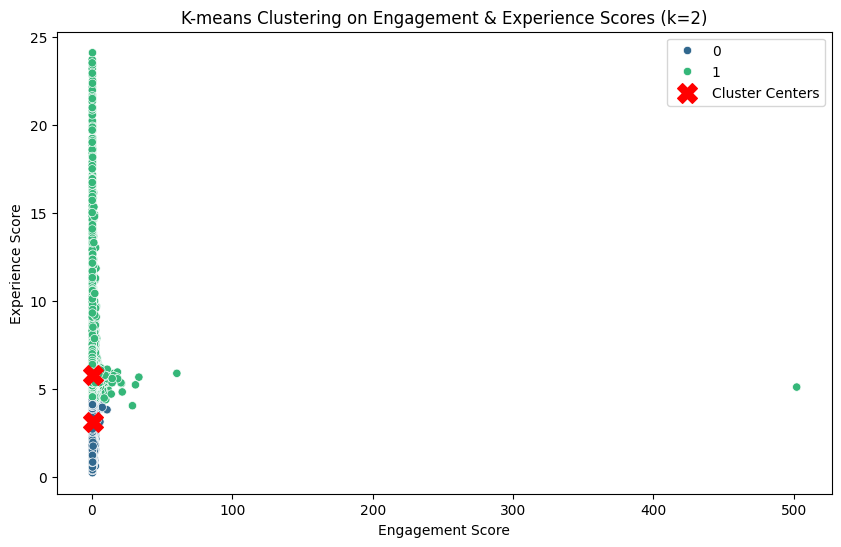

Cluster 0 Summary:
  Avg Engagement Score: 0.40
  Avg Experience Score: 3.08
  Number of Customers: 4993

Cluster 1 Summary:
  Avg Engagement Score: 0.49
  Avg Experience Score: 5.78
  Number of Customers: 101863



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for clustering
engagement_experience_data = df_agg_engagement_experience[['Engagement_Score', 'Experience_Score']]

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_agg_engagement_experience['Engagement_Experience_Cluster'] = kmeans.fit_predict(engagement_experience_data)

# Extract cluster centers for visualization
cluster_centers = kmeans.cluster_centers_

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Engagement_Score',
    y='Experience_Score',
    hue='Engagement_Experience_Cluster',
    palette='viridis',
    data=df_agg_engagement_experience
)
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Cluster Centers'
)
plt.title("K-means Clustering on Engagement & Experience Scores (k=2)")
plt.xlabel("Engagement Score")
plt.ylabel("Experience Score")
plt.legend()
plt.show()

# Describe each cluster
for cluster_id in range(2):
    cluster_data = df_agg_engagement_experience[df_agg_engagement_experience['Engagement_Experience_Cluster'] == cluster_id]
    print(f"Cluster {cluster_id} Summary:")
    print(f"  Avg Engagement Score: {cluster_data['Engagement_Score'].mean():.2f}")
    print(f"  Avg Experience Score: {cluster_data['Experience_Score'].mean():.2f}")
    print(f"  Number of Customers: {len(cluster_data)}")
    print()

## Task 4.5  - Aggregate the average satisfaction & experience score per cluster. 

In [21]:
# Aggregate satisfaction and experience scores per cluster
cluster_summary = df_agg_engagement_experience.groupby('Engagement_Experience_Cluster').agg(
    Avg_Satisfaction_Score=('Satisfaction_Score', 'mean'),
    Avg_Experience_Score=('Experience_Score', 'mean'),
    Count=('Engagement_Score', 'count')  # Optional: Include the count of users per cluster
).reset_index()

# Print the results
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
    Engagement_Experience_Cluster  Avg_Satisfaction_Score  \
0                              0                1.739036   
1                              1                3.131893   

   Avg_Experience_Score   Count  
0              3.080743    4993  
1              5.777290  101863  


## Task 4.6 - Export your final table containing all user ID + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 

In [ ]:
from scripts.data_cleaner import insert_scores

insert_scores(df_agg_engagement_experience)
print("Data has been exported to PostgreSQL successfully!")

Data has been exported to PostgreSQL successfully!


## Select Query Output on the from the expoerted table

In [23]:
query = 'select * from user_scores'
execute_query(query)

,user_id,engagement_score,experience_score,satisfaction_score
0,33601001722.0,0.19990301621236262,5.912725206580274,3.0563141113963184
1,33601001754.0,0.35277495197989045,6.017326051103768,3.1850505015418293
2,33601002511.0,0.13088722812429834,5.3449485809898,2.737917904557049
3,33601007832.0,0.2578105677086751,5.6180402417086786,2.9379254047086767
4,33601008617.0,0.7169799611471809,5.868388618915528,3.2926842900313544
...,...,...,...,...
106851,33789996170.0,0.3664701715277584,5.8325777974359285,3.0995239844818436
106852,33789997247.0,0.1567477635072957,5.954442352285989,3.0555950578966424
106853,3197020876596.0,2.4795196471682592,5.3453599044660605,3.91243977581716
106854,337000037000919.0,0.4622674715929427,5.34522224145297,2.903744856522956


# Task 5 : Dashboard Development 

**Dashboard Screenshot saved on Dashboard Screenshot foler**